<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Проверка-расчета-recovery" data-toc-modified-id="Проверка-расчета-recovery-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета recovery</a></span></li><li><span><a href="#Анализ-признаков-test" data-toc-modified-id="Анализ-признаков-test-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков test</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb)</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья" data-toc-modified-id="Распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ" data-toc-modified-id="Суммарная-концентрация-всех-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Rougher-predict" data-toc-modified-id="Rougher-predict-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Rougher predict</a></span></li><li><span><a href="#Final-predict" data-toc-modified-id="Final-predict-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Final predict</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения. Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

Установим библиотеку missingno

In [1]:
import sys
!{sys.executable} -m pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy import stats as st
import missingno as msno

pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [4]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

Названия столбцов заданы правильно, данные в одном формате

### Работа с пропусками

In [6]:
train.isna().sum().sort_values()

date                                           0
rougher.output.concentrate_pb                  0
rougher.state.floatbank10_f_level              0
rougher.state.floatbank10_f_air                0
rougher.state.floatbank10_e_level              0
                                            ... 
secondary_cleaner.state.floatbank2_a_air     217
primary_cleaner.output.concentrate_sol       286
rougher.input.floatbank11_xanthate           428
rougher.state.floatbank10_e_air              436
secondary_cleaner.output.tail_sol           1605
Length: 87, dtype: int64

Больше всего пропусков в признаке secondary_cleaner.output.tail_sol - 1605 <br>
В остальных признаках пропусков не больше 3%

Изучим пропуски при помощи установленной библиотеки missingno

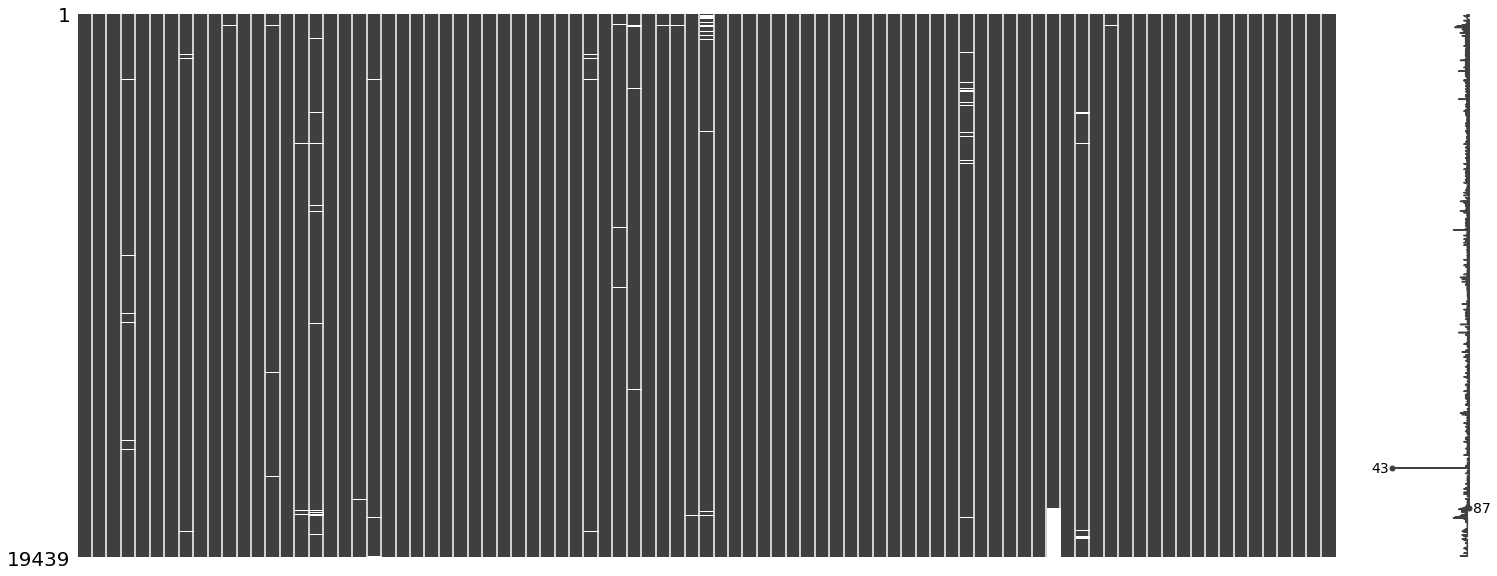

In [7]:
msno.matrix(df.sort_values('secondary_cleaner.output.tail_sol'))

Явной закономерности не просматривается

Посмотрим только на столбцы с пропусками

In [8]:
features_with_na = [feature for feature in df.columns if df[feature].isna().sum() > 1]

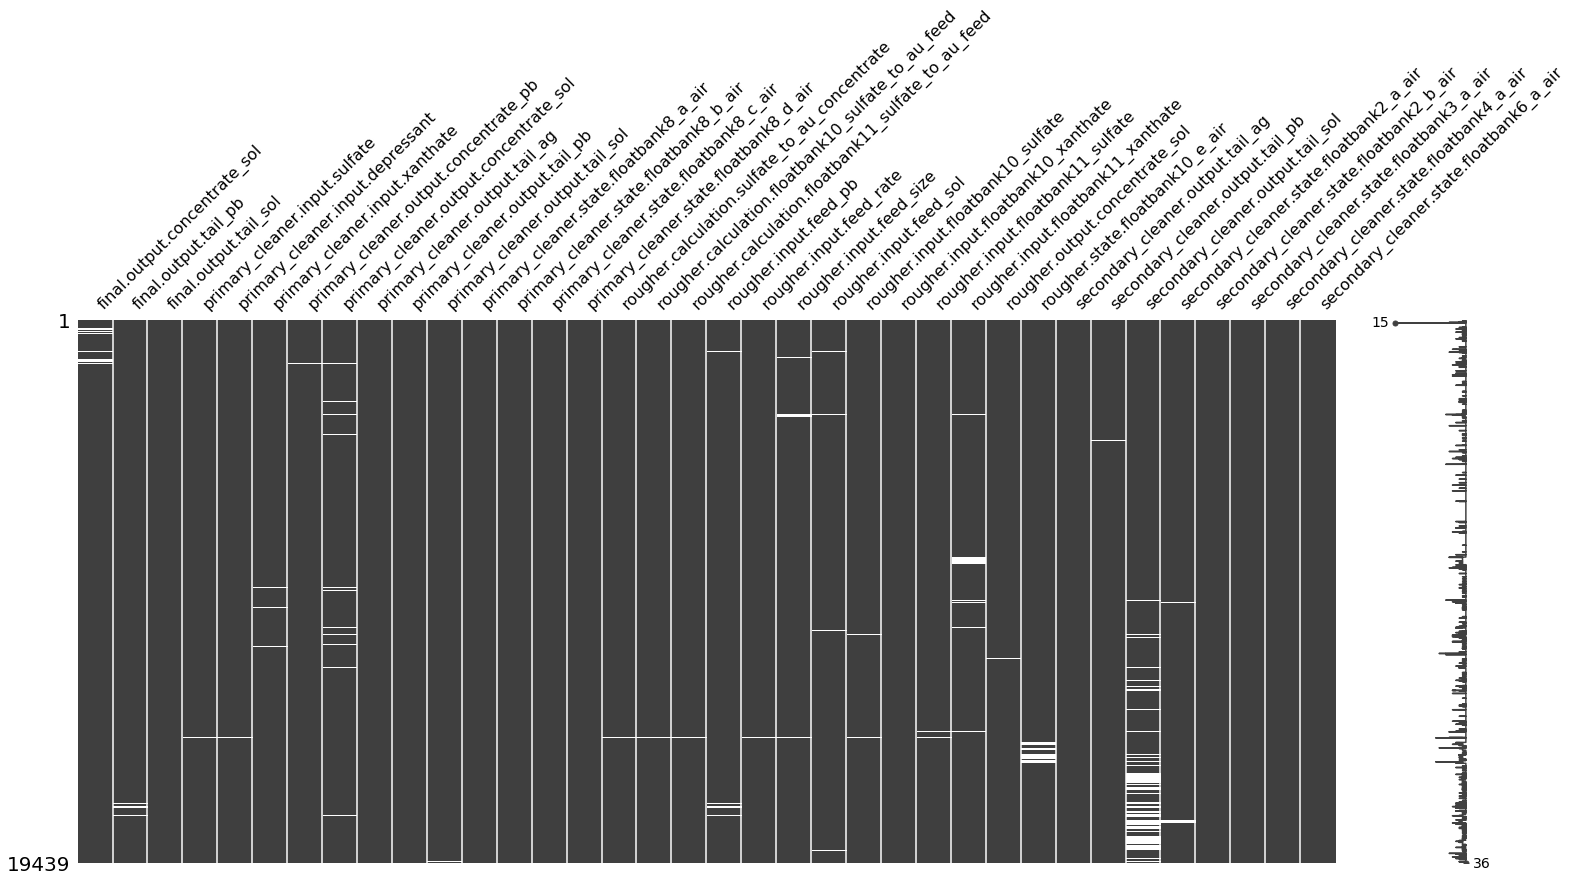

In [9]:
msno.matrix(df[features_with_na])

Рассмотрим взяимосвяь пропусков

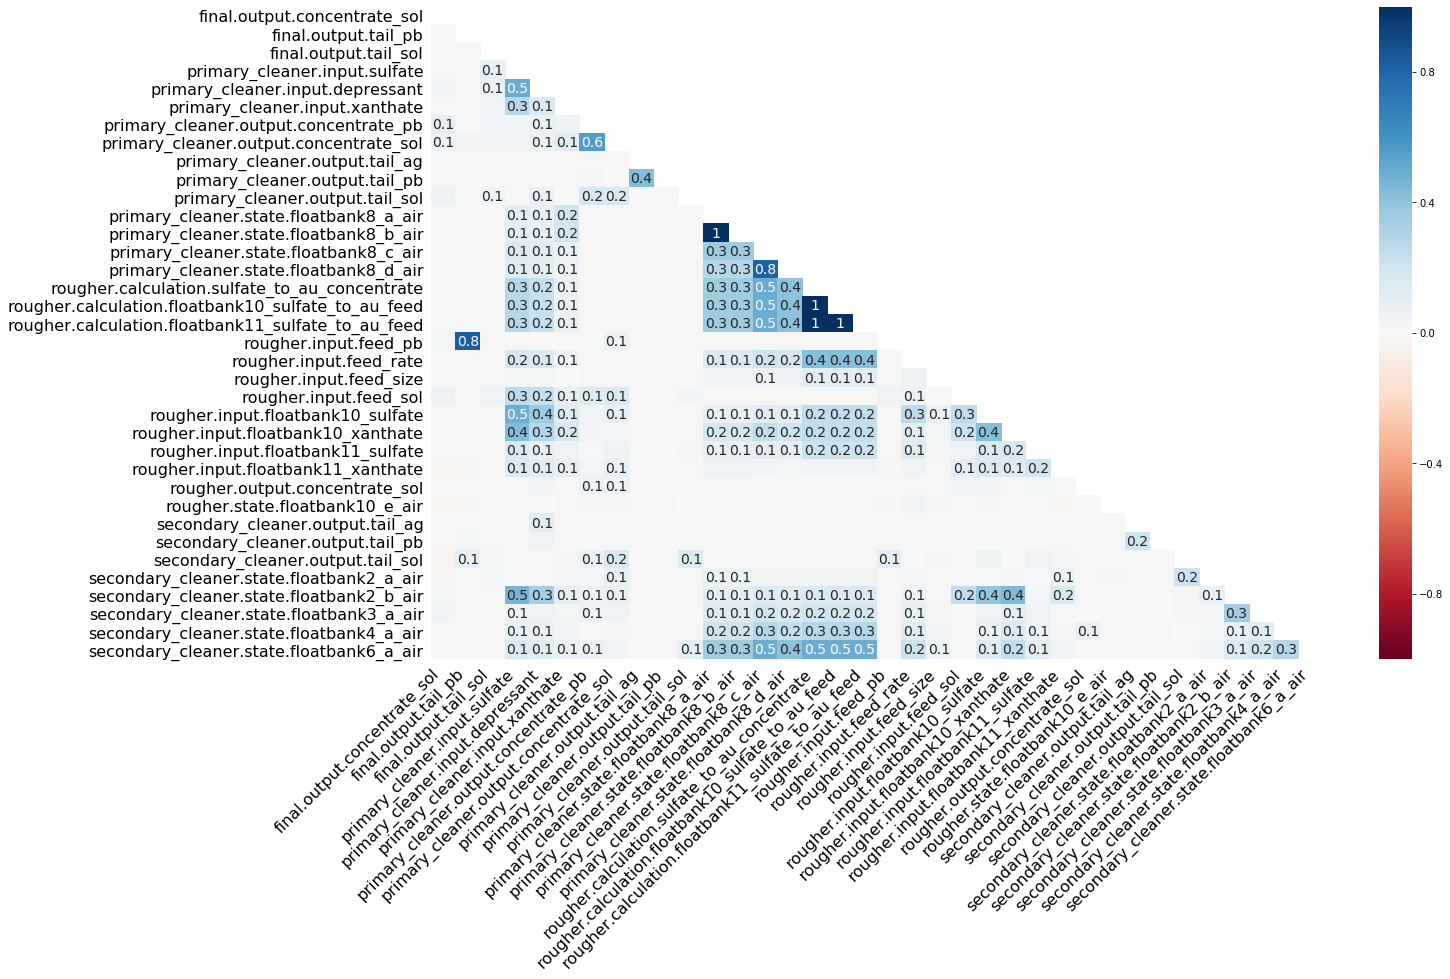

In [10]:
msno.heatmap(df[features_with_na])

Каких-либо специфичных взаимосвязей нет

Посомтрим объем заполнения df

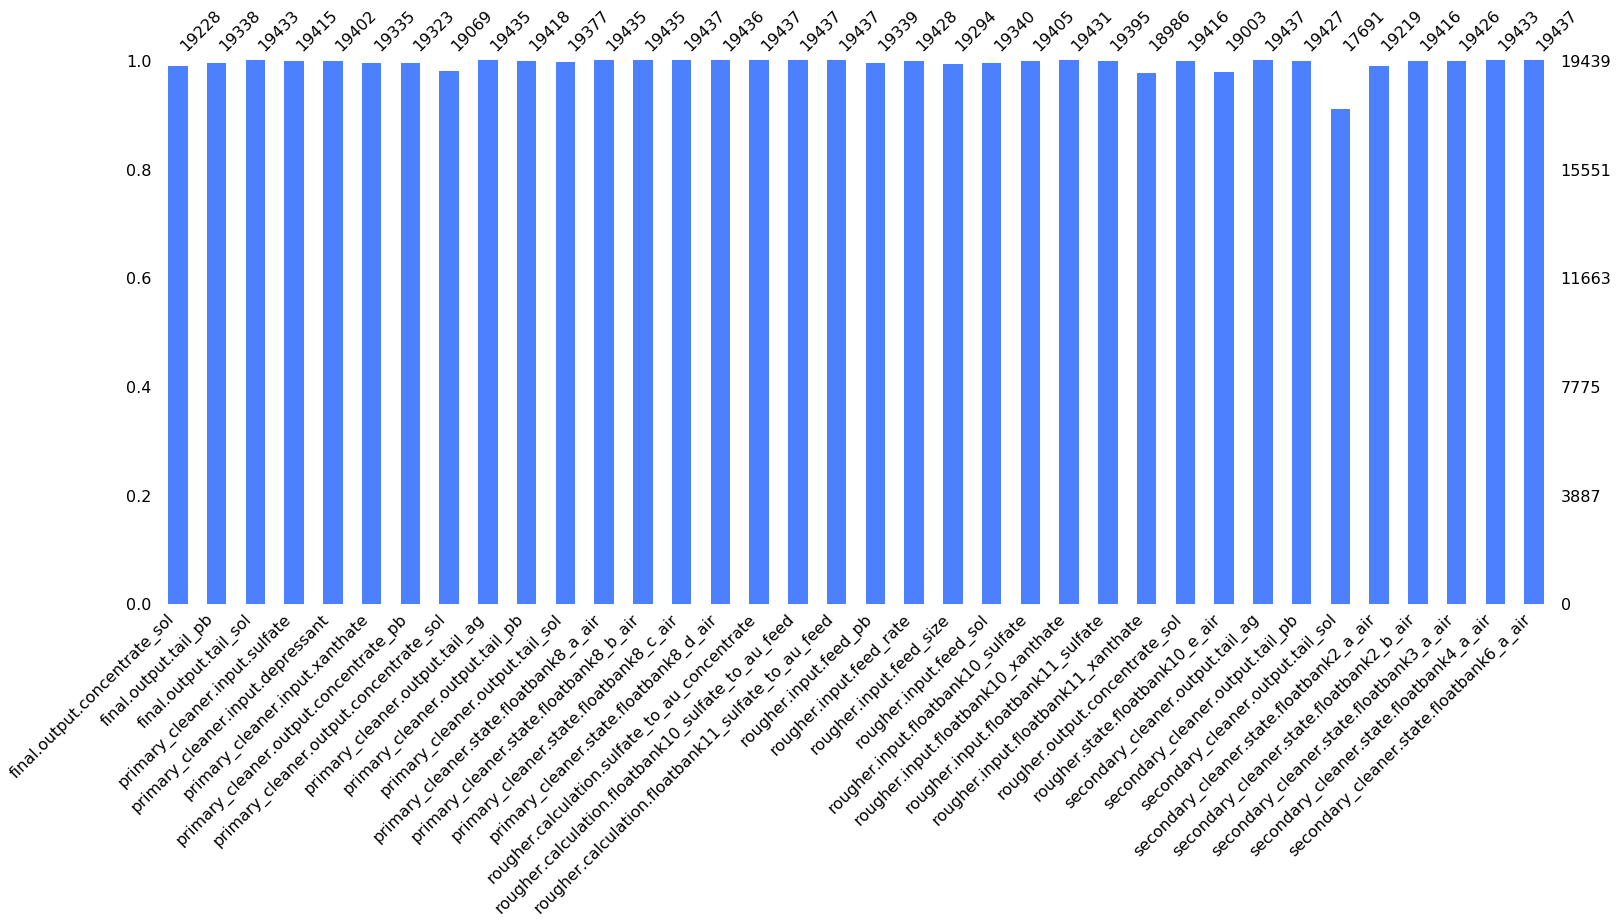

In [11]:
msno.bar(df[features_with_na], labels=True, color=(0.3,0.5,1))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

Удалим признак secondary_cleaner.output.tail_sol

In [13]:
train.drop('secondary_cleaner.output.tail_sol', axis=1, inplace=True)

По условия задачи близкие по времени наблюдения практически идентичны, это дает нам право заполнить пропуски предыдущими не na значениями

In [14]:
test.fillna(method='ffill', inplace=True)
train.fillna(method='ffill', inplace=True)

### Проверка расчета recovery

Напишем функцию проверки, что эффективность обогащения рассчитана правильно

In [15]:
def recovery(data):
    return ((data['rougher.output.concentrate_au']
            *(data['rougher.input.feed_au']
              - data['rougher.output.tail_au'])*100)
            /(data['rougher.input.feed_au']
            *(data['rougher.output.concentrate_au']
              - data['rougher.output.tail_au'])))

Вычислим её на обучающей выборке для признака rougher.output.recovery

In [16]:
recovery(train)

0       87.11
1       86.84
2       86.84
3       87.23
4       86.69
         ... 
14144   89.57
14145   87.72
14146   88.89
14147   89.86
14148   89.51
Length: 14149, dtype: float64

Найдем MAE между нашими расчётами и значением признака

In [17]:
mean_absolute_error(train['rougher.output.recovery'], recovery(train))

1.1100347049376097e-14

MAE минимальное, расчеты выполнены правильно

### Анализ признаков test

Проанализируем признаки, недоступные в тестовой выборке

In [18]:
train[train.columns[~train.columns.isin(test.columns)]].columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

In [19]:
dif_columns = pd.DataFrame([train.columns, train.columns.isin(test.columns)]).T
dif_columns.columns = ['column', 'test_columns']

In [20]:
dif_columns.head(60)

,column,test_columns
0,date,True
1,final.output.concentrate_ag,False
2,final.output.concentrate_pb,False
3,final.output.concentrate_sol,False
4,final.output.concentrate_au,False
5,final.output.recovery,False
6,final.output.tail_ag,False
7,final.output.tail_pb,False
8,final.output.tail_sol,False
9,final.output.tail_au,False


В train выборке нет признаков outpoot и calculate, те значеня после обработки недоступны

## Анализ данных

### Концентрация металлов (Au, Ag, Pb)

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [21]:
ag_conc = df[['rougher.output.concentrate_ag',
   'primary_cleaner.output.concentrate_ag',
   'final.output.concentrate_ag']
  ]

ag_conc.columns = ['rougher', 'primary_cleaner', 'final']
ag_conc.mean()

rougher           11.99
primary_cleaner    8.44
final              5.17
dtype: float64

In [22]:
au_conc = df[['rougher.output.concentrate_au',
   'primary_cleaner.output.concentrate_au',
   'final.output.concentrate_au']
  ]
au_conc.columns = ['rougher', 'primary_cleaner', 'final']
au_conc.mean()

rougher           19.77
primary_cleaner   32.12
final             44.08
dtype: float64

In [23]:
pb_conc = df[['rougher.output.concentrate_pb',
   'primary_cleaner.output.concentrate_pb',
   'final.output.concentrate_pb']
  ]
pb_conc.columns = ['rougher', 'primary_cleaner', 'final']
pb_conc.mean()

rougher           7.61
primary_cleaner   9.83
final             9.98
dtype: float64

Концентрация серебра сокращается, а свинца и золота растет

### Распределения размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

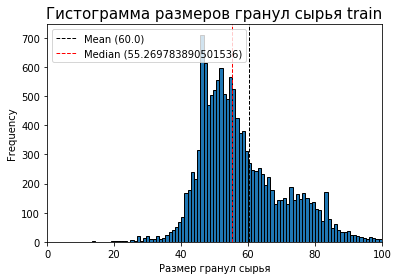

In [24]:
axes = plt.axes()
axes.set_xlim([0, 100])
plt.hist(train['rougher.input.feed_size'], bins=500, edgecolor='k')
plt.title("Гистограмма размеров гранул сырья train", fontsize=15)
plt.xlabel("Размер гранул сырья")
plt.ylabel("Frequency")

plt.axvline(train['rougher.input.feed_size'].mean(),\
            color='k', linestyle='dashed', linewidth=1,\
            label=f'Mean ({train["rougher.input.feed_size"].mean().round()})')
plt.axvline(train['rougher.input.feed_size'].median(),\
            color='r', linestyle='dashed', linewidth=1,\
            label=f'Median ({train["rougher.input.feed_size"].median()})')

plt.legend()

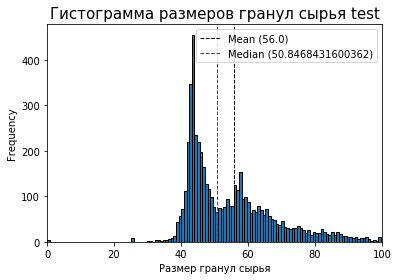

In [25]:
axes = plt.axes()
axes.set_xlim([0, 100])
plt.hist(test['rougher.input.feed_size'], bins=500, edgecolor='k')
plt.title("Гистограмма размеров гранул сырья test", fontsize=15)
plt.xlabel("Размер гранул сырья")
plt.ylabel("Frequency")

plt.axvline(test['rougher.input.feed_size'].mean(),\
            color='k', linestyle='dashed', linewidth=1,\
            label=f'Mean ({test["rougher.input.feed_size"].mean().round()})')
plt.axvline(test['rougher.input.feed_size'].median(),\
            color='r', linestyle='dashed', linewidth=1,\
            label=f'Median ({test["rougher.input.feed_size"].median()})')

plt.legend()

Средние и медианы не сильно отличаются, удостоверимся стат тестом

In [26]:
st.ttest_ind(test.dropna()['rougher.input.feed_size'], train.dropna()['rougher.input.feed_size'])

Ttest_indResult(statistic=-12.088216423310302, pvalue=1.6081245670847274e-33)

Значимых отличий нет

### Суммарная концентрация всех веществ

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [27]:
sol_conc = df[['rougher.output.concentrate_sol',
   'primary_cleaner.output.concentrate_sol',
   'final.output.concentrate_sol']
  ]
sol_conc.columns = ['rougher', 'primary_cleaner', 'final']
sol_conc.mean()

rougher           28.81
primary_cleaner   10.49
final              9.50
dtype: float64

In [28]:
df['rougher'] = df['rougher.output.concentrate_ag']\
+ df['rougher.output.concentrate_au']\
+ df['rougher.output.concentrate_pb']\
+ df['rougher.output.concentrate_sol']

df['primary_cleaner'] = df['primary_cleaner.output.concentrate_ag']\
+ df['primary_cleaner.output.concentrate_au']\
+ df['primary_cleaner.output.concentrate_pb']\
+ df['primary_cleaner.output.concentrate_sol']

df['final'] = df['final.output.concentrate_ag']\
+ df['final.output.concentrate_au']\
+ df['final.output.concentrate_pb']\
+ df['final.output.concentrate_sol']

df_concentrate = pd.concat([df['rougher'], df['primary_cleaner'], df['final']], axis=1)
df_concentrate

,rougher,primary_cleaner,final
0,66.42,72.64,63.64
1,67.01,72.54,63.96
2,66.10,72.10,64.31
3,65.75,59.96,63.57
4,65.91,71.32,64.00
...,...,...,...
19434,70.78,59.00,68.10
19435,70.54,59.70,68.27
19436,55.38,59.56,68.23
19437,69.20,57.22,68.20


In [29]:
df_concentrate.mean()

rougher           68.19
primary_cleaner   60.95
final             68.73
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

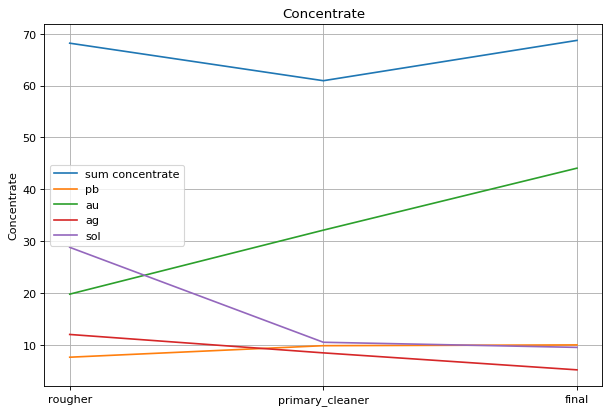

In [30]:
fig, ax = plt.subplots(figsize=(9, 6), dpi=80)
ax.plot(df_concentrate.mean())
ax.plot(pb_conc.mean())
ax.plot(au_conc.mean())
ax.plot(ag_conc.mean())
ax.plot(sol_conc.mean())
plt.grid(True)
plt.legend(['sum concentrate', 'pb', 'au', 'ag', 'sol'])
plt.title('Concentrate')
plt.ylabel('Concentrate')
plt.show

In [31]:
len(df['date'].unique())

19439

In [32]:
len(df)

19439

In [33]:
train.drop(train[train['date'].isin(df[df['rougher'] == 0]['date'])].index, inplace=True)

In [34]:
test.drop(test[test['date'].isin(df[df['rougher'] == 0]['date'])].index, inplace=True)

## Модель

Напишим функцию для вычисления sMAPE и итоговой sMAPE

In [35]:
def smape(estimator, X, y):
    return 1/len(estimator.predict(X)) * np.sum(2 * np.abs(y-estimator.predict(X)) / (np.abs(estimator.predict(X)) + np.abs(y))*100)

In [36]:
def final_smape(scores_rougher, scores_final):
    return 0.25*scores_rougher+0.75*scores_final

Добавим в тестовую выборку два целевых признака

In [37]:
test = test.set_index('date').join(df[['final.output.recovery', 'date']].set_index('date'))

In [38]:
test = test.join(df[['rougher.output.recovery', 'date']].set_index('date'))

### Rougher predict

Отберем признаки для стадии rougher

In [39]:
rougher_cols = [col for col in test.columns if 'rougher' in col]

Выделим признаки и целевой признак

In [40]:
target_train = train['rougher.output.recovery']
features_train = train[rougher_cols].drop(['rougher.output.recovery'] , axis=1)
target_test = test['rougher.output.recovery']
features_test = test[rougher_cols].drop(['rougher.output.recovery'] , axis=1)

In [41]:
features_train.shape, features_test.shape

((13852, 22), (5193, 22))

Линейная регрессия

In [42]:
lr = LinearRegression()
lr.fit(features_train, target_train)
scores_rougher = cross_val_score(lr, features_train, target_train, scoring=smape, cv=5)
print('scores = {} \nmean score = {:.5f} +/- {:.5f}'.format(scores_rougher, scores_rougher.mean(), scores_rougher.std()))

scores = [8.21375672 7.91240644 4.45619816 4.87491834 7.99501904] 
mean score = 6.69046 +/- 1.66154


Решающее дерево

In [43]:
tree_params = {'max_depth': list(range(1,20))}

In [44]:
dt = DecisionTreeRegressor()

tree_grid = GridSearchCV(dt,
                         tree_params,
                         cv=5,
                         scoring=smape,
                         n_jobs=-1
                        )
tree_grid.fit(features_train, target_train)
print(tree_grid.best_params_, tree_grid.best_score_)

scores_final = tree_grid.best_score_
print('scores = {}'.format(scores_final))

{'max_depth': 16} 8.927036145545642
scores = 8.927036145545642


Метод ближайших соседей

In [45]:
kn_params = {'n_neighbors': list(range(1,5))}

In [46]:
kn = KNeighborsRegressor()
kn_grid = GridSearchCV(kn,
                       kn_params,
                       cv=5,
                       scoring=smape,
                       n_jobs=-1
                       )
kn_grid.fit(features_train, target_train)
print(kn_grid.best_params_, kn_grid.best_score_)

scores_final = kn_grid.best_score_
print('scores = {}'.format(scores_final))

{'n_neighbors': 1} 11.050317269287623
scores = 11.050317269287623


Лучшая по метрике sMAPE - линейная регрессия <br>
Проверим ее на тестовой выборке

In [47]:
lr.predict(features_test)
smape(lr, features_test, target_test)

4.605669758825972

На тестовой выборке оценка не падает, модель обучена правильно

In [48]:
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(features_train, target_train)

scores_dummy = cross_val_score(dummy_regressor_rougher, features_train, target_train, scoring=smape, cv=5)
print('scores = {} \nmean score = {:.5f} +/- {:.5f}'.format(scores_final, scores_final.mean(), scores_final.std()))

scores = 11.050317269287623 
mean score = 11.05032 +/- 0.00000


Оценка DummyRegressor выше, чем на нашей лучшей модели, значит модель эффективнее чем просто предсказание среднего

### Final predict

Отберем признаки для стадии final

In [49]:
final_cols = test.columns

Выделим признаки и целевой признак

In [50]:
target_train = train['final.output.recovery']
features_train = train[final_cols].drop(['final.output.recovery'], axis=1)
target_test = test['final.output.recovery']
features_test = test[final_cols].drop(['final.output.recovery'], axis=1)

In [51]:
features_train.shape, features_test.shape

((13852, 53), (5193, 53))

Линейная регрессия

In [52]:
lr = LinearRegression()
lr.fit(features_train, target_train)
scores_final = cross_val_score(lr, features_train, target_train, scoring=smape, cv=5)
print('scores = {} \nmean score = {:.5f} +/- {:.5f}'.format(scores_final, scores_final.mean(), scores_final.std()))

scores = [10.23733751  8.9983152   9.08490223  9.14340537 10.25425066] 
mean score = 9.54364 +/- 0.57519


Решающее дерево

In [53]:
tree_params = {'max_depth': list(range(1,20))}

In [54]:
dt = DecisionTreeRegressor()

tree_grid = GridSearchCV(dt,
                         tree_params,
                         cv=5,
                         scoring=smape,
                         n_jobs=-1
                        )
tree_grid.fit(features_train, target_train)
print(tree_grid.best_params_, tree_grid.best_score_)

scores_final = tree_grid.best_score_
print('scores = {}'.format(scores_final))

{'max_depth': 19} 19.629717963620603
scores = 19.629717963620603


Метод ближайших соседей

In [55]:
kn_params = {'n_neighbors': list(range(1,5))}

In [56]:
kn = KNeighborsRegressor()
kn_grid = GridSearchCV(kn,
                       kn_params,
                       cv=5,
                       scoring=smape,
                       n_jobs=-1
                       )
kn_grid.fit(features_train, target_train)
print(kn_grid.best_params_, kn_grid.best_score_)

scores_final = kn_grid.best_score_
print('scores = {}'.format(scores_final))

{'n_neighbors': 1} 16.681550671544443
scores = 16.681550671544443


Лучшая по метрике sMAPE - линейная регрессия <br>
Проверим ее на тестовой выборке

In [57]:
lr.predict(features_test)
smape(lr, features_test, target_test)

9.198504450720911

На тестовой выборке оценка не падает, модель обучена правильно

In [58]:
dummy_regressor_final = DummyRegressor(strategy="median")
dummy_regressor_final.fit(features_train, target_train)

scores_dummy = cross_val_score(dummy_regressor_final, features_train, target_train, scoring=smape, cv=5)
print('scores = {} \nmean score = {:.5f} +/- {:.5f}'.format(scores_final, scores_final.mean(), scores_final.std()))

scores = 16.681550671544443 
mean score = 16.68155 +/- 0.00000


Оценка DummyRegressor выше, чем на нашей лучшей модели, значит модель эффективнее чем просто предсказание среднего

Найдем итоговое sMAPE

In [60]:
final_smape(6.69, 9.54)

8.827499999999999

Для DummyRegressor

In [61]:
final_smape(11.05, 16.68)

15.2725

Итоговый sMAPE для DummyRegressor намного хуже полученного Линейной регрессией, модель дает хорошее качество

In [62]:
df['final.output.recovery'].describe()

count   19,439.00
mean        67.05
std         10.13
min          0.00
25%         63.30
50%         68.17
75%         72.69
max        100.00
Name: final.output.recovery, dtype: float64

Оценки на этапах получились очень близкими. На обоих этапах лучшими моделями были линейные регрессии. При среднем значении recovery - 67.05 значение метрики итоговое sMAPE - 12.1 - составляет 18%, те модель ошибается в среднем на 18%